In [16]:
from IPython.display import clear_output
#!pip install bokeh
#!pip install astropy
clear_output()
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.table import Table
from astropy.io import ascii
from astropy.timeseries import LombScargle
from bokeh import plotting
from bokeh.models import Span
plotting.output_notebook()

In [17]:
def listagem_dir(dir):
    import os
    pasta = dir
    data=[]
    for diretorio, subpastas, arquivos in os.walk(pasta):
        for arquivo in arquivos:
            data.append(os.path.join(diretorio,arquivo))
    return data

x = []
identity = []
def datasets(dir,size,classe):
    i = 0
    for i in range(size):
            t = Table.read(listagem_dir(dir)[i+1], format='ascii',names=['HJD','mag','err']).to_pandas()
            identity.append(listagem_dir(dir)[i+1].split('/')[5])
            x.append(t)
    return x

def busca():
    star = 'OGLE'
    print('info:\n\ttarget=NULL retorna todos os target\n\ttarget=LMC/SMC retorna os grupos\n\ttarget=numeração retorna a estrela específica')
    star = input("\n\nidentifique o target: ")
    for i in range(len(identity)):
        if star in identity[i]:
            print(f'index:\ttarget:\n{i}\t{identity[i]}')

def ploting(index):
    # Start figure and axis.
    fig, ax = plt.subplots()

    # Plot the timeseries in black circles.
    ax.plot(cepheids[index]["HJD"], cepheids[index]["mag"], 'ko')

    # Let's label the axes and define a title for the figure.
    fig.suptitle(f"{identity[index].split('.')[0]} - I-Band")
    ax.set_ylabel("Magnitude")
    ax.set_xlabel("HJD")
    plt.show()
  
def Detrended_Lightcurve(index):

  bfig = plotting.figure(plot_width=850, plot_height=300, title=f'Detrended Lightcurve ({identity[index].split(".")[0]})')

  bfig.circle(cepheids[index]['HJD'], cepheids[index]['mag'], fill_color="black", size=4, line_color=None)
  bfig.line(cepheids[index]['HJD'], cepheids[index]['mag'], line_color='black')

  bfig.xaxis.axis_label = "Time (HJD)"
  bfig.yaxis.axis_label = "Magnitude"

  plotting.show(bfig)

def periodograma(index, frequency, power):
    bfig = plotting.figure(plot_width=850, plot_height=300, x_range=(0,25),
                        title=f"Periodogram ({identity[index].split('.')[0]}Light Curve - I-Band)")
    bfig.line(frequency, power, line_color='black')
    bfig.xaxis.axis_label = "Frequency (1/day)"
    bfig.yaxis.axis_label = "Power"

    plotting.show(bfig)

def phased_light_curve(index):
  bfig = plotting.figure(plot_width=850, plot_height=300, title=f'Phased light curve ({identity[index].split(".")[0]} Light Curve - I-Band)')

  # plotagem da fase
  bfig.circle(cepheids[index]["HJD"]%(1/dominant_freq),cepheids[index]["mag"], fill_color="black",size=4, line_color=None)

  # plotagem do periodo fit
  t_fit = np.linspace(0,1/dominant_freq,100)
  bfig.line(t_fit, lomb.model(t_fit, dominant_freq), color='#1b9f00', line_width=2)

  # labels axis
  bfig.xaxis.axis_label = "fase (dias)"
  bfig.yaxis.axis_label = "Flux"
  plotting.show(bfig)

In [18]:
cepheids = datasets('/content/drive/MyDrive/datasets', len(listagem_dir('/content/drive/MyDrive/datasets'))//50, 0)

In [19]:
busca()

info:
	target=NULL retorna todos os target
	target=LMC/SMC retorna os grupos
	target=numeração retorna a estrela específica


identifique o target: 
index:	target:
0	OGLE-LMC-CEP-0862.dat
index:	target:
1	OGLE-SMC-CEP-1260.dat
index:	target:
2	OGLE-SMC-CEP-1425.dat
index:	target:
3	OGLE-LMC-CEP-3031.dat
index:	target:
4	OGLE-SMC-CEP-0382.dat
index:	target:
5	OGLE-SMC-CEP-0566.dat
index:	target:
6	OGLE-SMC-CEP-1620.dat
index:	target:
7	OGLE-LMC-CEP-1936.dat
index:	target:
8	OGLE-SMC-CEP-0553.dat
index:	target:
9	OGLE-SMC-CEP-2140.dat
index:	target:
10	OGLE-SMC-CEP-1770.dat
index:	target:
11	OGLE-SMC-CEP-1990.dat
index:	target:
12	OGLE-SMC-CEP-0274.dat
index:	target:
13	OGLE-LMC-CEP-0717.dat
index:	target:
14	OGLE-SMC-CEP-1882.dat
index:	target:
15	OGLE-LMC-CEP-2658.dat
index:	target:
16	OGLE-SMC-CEP-2481.dat
index:	target:
17	OGLE-SMC-CEP-0951.dat
index:	target:
18	OGLE-SMC-CEP-1230.dat
index:	target:
19	OGLE-SMC-CEP-1719.dat
index:	target:
20	OGLE-LMC-CEP-2660.dat
index:	target:
21	OGL

In [20]:
index = int(input("Escolha o index do target: "))
print(f'target selecionado: {identity[index]}')

Escolha o index do target: 33
target selecionado: OGLE-SMC-CEP-0525.dat


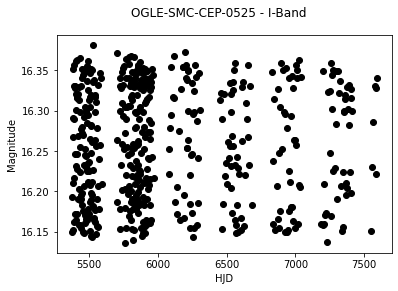

In [21]:
ploting(index)

In [22]:
Detrended_Lightcurve(index)

In [23]:
lomb = LombScargle(cepheids[index]["HJD"], cepheids[index]["mag"])
frequency, power = lomb.autopower(maximum_frequency= 25)
periodograma(index, frequency, power)

In [24]:
dominant_freq = frequency[np.argmax(power)]
print(f'{identity[index].split(".")[0]}\nperíodo dominante: {1/dominant_freq:.5} dias\nperíodo dominante: {1/dominant_freq*24:.3} horas')

OGLE-SMC-CEP-0525
período dominante: 1.7396 dias
período dominante: 41.7 horas


In [25]:
phased_light_curve(index)